In [1]:
import os
import subprocess
import pandas as pd

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [3]:
raw_data = {'Cache_Size': [], 'LRU': [], 'TWO_Q 10': [], 'TWO_Q 30': [], 'TWO_Q 50': []}

cache_ratio = 10
data = data_list[1]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q 10'].append(float(ratio[4]))

cache_ratio = 30

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 30'].append(float(ratio[4]))

cache_ratio = 50

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 50'].append(float(ratio[4]))

In [4]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,LRU,TWO_Q 10,TWO_Q 30,TWO_Q 50
Cache_Size,,,,
100,43.2,17.0,42.6,43.4
200,46.3,44.0,46.1,45.9
300,48.9,46.4,48.9,48.6
400,50.0,47.6,50.2,50.3
500,50.8,48.4,51.0,51.1
600,51.3,49.2,51.5,51.7
700,51.6,50.0,51.9,52.1
800,52.0,50.5,52.2,52.3
900,52.3,51.0,52.5,52.6


<AxesSubplot:xlabel='Cache_Size'>

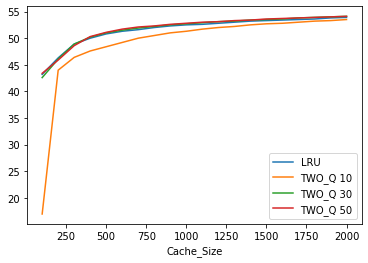

In [5]:
#data4
df_hitRatio.plot()